# Basic imports & first analysis
## Articles

In [1]:
#all imports needed for this section
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import spacy
from tqdm import tqdm

#currently not in use:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
#Dependencies for text analytics (need to be downloaded manually)
# Download necessary NLTK resources (if not already downloaded)
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

#Spacy (currently in use)
#python -m spacy download de_core_news_md

In [3]:
# folder locations for this section
article_folder = 'data'
price_folder = 'data/stocks'

# define keys from scraper for no successes
target_values = {
    'Titel': 'NO_TITLE',
    'Datum': 'NO_DATE',
    'Quelle': 'NO_SOURCE',
    'Text': 'NO_TEXT'
}

# Initialize an empty list to store DataFrames from each file
data_frames = []

# Loop through each file in the folder
for filename in os.listdir(article_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(article_folder, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        data_frames.append(df)

# Combine all DataFrames in the list into one
df_articles = pd.concat(data_frames, ignore_index=True)

## first dataframe analytics for articles

In [4]:
#explorative analysis
df_articles.head()

,Unternehmen,Newstyp,Titel,Datum,Quelle,URL,Text
0,Adidas,Aktieneinstufung,ANALYSE-FLASH: Goldman hebt Ziel für Adidas au...,"06.09.2023, 15:08",dpa-AFX,https://www.onvista.de/news/2023/09-06-analyse...,NEW YORK (dpa-AFX) - Goldman Sachs hat das Kur...
1,Adidas,Aktieneinstufung,ANALYSE-FLASH: Goldman belässt Adidas auf 'Neu...,"26.07.2023, 15:20",dpa-AFX,https://www.onvista.de/news/2023/07-26-analyse...,NEW YORK (dpa-AFX Broker) - Die US-Investmentb...
2,Adidas,Aktieneinstufung,ANALYSE-FLASH: Stifel belässt Adidas auf 'Hold...,"25.07.2023, 15:19",dpa-AFX,https://www.onvista.de/news/2023/07-25-analyse...,FRANKFURT (dpa-AFX) - Die Investmentbank Stife...
3,Adidas,Aktieneinstufung,ANALYSE/Exane BNP wechselt Seite: Adidas nun F...,"25.07.2023, 14:18",dpa-AFX,https://www.onvista.de/news/2023/07-25-analyse...,PARIS (dpa-AFX) - Ein Vergleich zwischen Europ...
4,Adidas,Aktieneinstufung,ANALYSE-FLASH: Deutsche Bank Research hebt Zie...,"25.07.2023, 09:49",dpa-AFX,https://www.onvista.de/news/2023/07-25-analyse...,FRANKFURT (dpa-AFX Broker) - Deutsche Bank Res...


In [5]:
#explorative analysis
df_articles.shape

(24333, 7)

In [6]:
#explorative analysis
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24333 entries, 0 to 24332
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unternehmen  24333 non-null  object
 1   Newstyp      24333 non-null  object
 2   Titel        24101 non-null  object
 3   Datum        24101 non-null  object
 4   Quelle       24101 non-null  object
 5   URL          24333 non-null  object
 6   Text         24198 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


In [7]:
#explorative analysis
df_articles.describe()

,Unternehmen,Newstyp,Titel,Datum,Quelle,URL,Text
count,24333,24333,24101,24101,24101,24333,24198
unique,23,12,16819,17996,19,19077,20387
top,Deutsche Bank,News,EQS-PVR: Covestro AG: Veröffentlichung gemäß §...,NO_DATE,dpa-AFX,https://www.onvista.de/news/2023/04-21-ex-chef...,NO_TEXT
freq,2031,11706,119,84,16091,11,233


## share price

In [8]:
# Load the CSV into a DataFrame
file_path = os.path.join(price_folder, 'kurse.csv')
df_stocks = pd.read_csv(file_path, sep=";", encoding='cp1252')
df_stocks.head()

,Date,Kurs-Adidas,Kurs-Airbus Group (EADS),Kurs-Allianz,Kurs-BASF,Kurs-Bayer,Kurs-Beiersdorf,Kurs-BMW,Kurs-Brenntag,Kurs-Commerzbank,...,Kursdifferenz-RWE,Kursdifferenz-SAP,Kursdifferenz-Sartorius (Vz.),Kursdifferenz-Siemens,Kursdifferenz-Siemens Energy,Kursdifferenz-Siemens Healthineers,Kursdifferenz-Symrise,Kursdifferenz-Volkswagen (Vz.),Kursdifferenz-Vonovia,Kursdifferenz-Zalando
0,Symbol,ADS,XFRA:AIR,XFRA:ALV,XFRA:BAS,BAYN,BEI,BMW,XFRA:BNR,XFRA:CBK,...,XFRA:RWE,XFRA:SAP,XFRA:SRT3,XFRA:SIE,XFRA:ENR,XFRA:SHL,XFRA:SY1,XFRA:VOW3,XFRA:VNA,XFRA:ZAL
1,onvista-Nr,36714349,98641,83219,34694526,25272187,81500,81490,28975512,83139,...,"82818,0000","82849,0000","82852,0000","82902,0000","180455076,0000","134397957,0000","15630917,0000","83057,0000","62903083,0000","81388537,0000"
2,01.06.2021,"298,30","108,28","217,00","67,84","51,63","96,70","89,26","78,12","6,67",...,"0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000"
3,02.06.2021,"297,35","110,70","216,00","67,94","51,99","99,14","89,97","77,20","6,85",...,"-0,0112","0,0000","-0,0274","0,0096","-0,0347","-0,0152","0,0023","0,0225","0,0119","0,0148"
4,03.06.2021,"298,50","110,06","218,15","68,20","52,28","99,14","93,63","77,90","6,89",...,"-0,0049","-0,0065","-0,0031","-0,0066","-0,0039","0,0134","0,0041","-0,0008","-0,0030","0,0161"


In [9]:
# drop not needed rows
df_stocks = df_stocks.drop(index=[0,1])
df_stocks = df_stocks.reset_index(drop=True)
df_stocks.head()

,Date,Kurs-Adidas,Kurs-Airbus Group (EADS),Kurs-Allianz,Kurs-BASF,Kurs-Bayer,Kurs-Beiersdorf,Kurs-BMW,Kurs-Brenntag,Kurs-Commerzbank,...,Kursdifferenz-RWE,Kursdifferenz-SAP,Kursdifferenz-Sartorius (Vz.),Kursdifferenz-Siemens,Kursdifferenz-Siemens Energy,Kursdifferenz-Siemens Healthineers,Kursdifferenz-Symrise,Kursdifferenz-Volkswagen (Vz.),Kursdifferenz-Vonovia,Kursdifferenz-Zalando
0,01.06.2021,"298,30","108,28","217,00","67,84","51,63","96,70","89,26","78,12","6,67",...,"0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000"
1,02.06.2021,"297,35","110,70","216,00","67,94","51,99","99,14","89,97","77,20","6,85",...,"-0,0112","0,0000","-0,0274","0,0096","-0,0347","-0,0152","0,0023","0,0225","0,0119","0,0148"
2,03.06.2021,"298,50","110,06","218,15","68,20","52,28","99,14","93,63","77,90","6,89",...,"-0,0049","-0,0065","-0,0031","-0,0066","-0,0039","0,0134","0,0041","-0,0008","-0,0030","0,0161"
3,04.06.2021,"296,55","109,92","218,25","68,46","52,58","100,45","94,25","77,40","6,75",...,"0,0078","0,0056","-0,0054","0,0041","-0,0071","0,0124","0,0129","-0,0012","0,0065","0,0250"
4,07.06.2021,"298,00","111,18","218,25","68,69","53,01","101,55","95,99","78,04","6,78",...,"-0,0065","0,0103","-0,0041","-0,0016","-0,0091","0,0086","0,0005","-0,0040","0,0049","0,0211"


In [10]:
# convert string to Datetime
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'], format='%d.%m.%Y')
# Replace commas with dots and convert to floats for columns 1 to 80
for col in range(1, 81):  # Adjust the range to include all columns
    df_stocks.iloc[:, col] = df_stocks.iloc[:, col].str.replace(',', '.').astype(float)
df_stocks.head()

,Date,Kurs-Adidas,Kurs-Airbus Group (EADS),Kurs-Allianz,Kurs-BASF,Kurs-Bayer,Kurs-Beiersdorf,Kurs-BMW,Kurs-Brenntag,Kurs-Commerzbank,...,Kursdifferenz-RWE,Kursdifferenz-SAP,Kursdifferenz-Sartorius (Vz.),Kursdifferenz-Siemens,Kursdifferenz-Siemens Energy,Kursdifferenz-Siemens Healthineers,Kursdifferenz-Symrise,Kursdifferenz-Volkswagen (Vz.),Kursdifferenz-Vonovia,Kursdifferenz-Zalando
0,2021-06-01,298.30,108.28,217.00,67.84,51.63,96.70,89.26,78.12,6.67,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2021-06-02,297.35,110.70,216.00,67.94,51.99,99.14,89.97,77.20,6.85,...,-0.0112,0.0000,-0.0274,0.0096,-0.0347,-0.0152,0.0023,0.0225,0.0119,0.0148
2,2021-06-03,298.50,110.06,218.15,68.20,52.28,99.14,93.63,77.90,6.89,...,-0.0049,-0.0065,-0.0031,-0.0066,-0.0039,0.0134,0.0041,-0.0008,-0.0030,0.0161
3,2021-06-04,296.55,109.92,218.25,68.46,52.58,100.45,94.25,77.40,6.75,...,0.0078,0.0056,-0.0054,0.0041,-0.0071,0.0124,0.0129,-0.0012,0.0065,0.0250
4,2021-06-07,298.00,111.18,218.25,68.69,53.01,101.55,95.99,78.04,6.78,...,-0.0065,0.0103,-0.0041,-0.0016,-0.0091,0.0086,0.0005,-0.0040,0.0049,0.0211


## first dataframe analytics for stock prices

In [11]:
#explorative analysis
df_stocks.shape

(597, 81)

In [12]:
#explorative analysis
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 81 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Date                                         597 non-null    datetime64[ns]
 1   Kurs-Adidas                                  597 non-null    float64       
 2   Kurs-Airbus Group (EADS)                     597 non-null    float64       
 3   Kurs-Allianz                                 597 non-null    float64       
 4   Kurs-BASF                                    597 non-null    float64       
 5   Kurs-Bayer                                   597 non-null    float64       
 6   Kurs-Beiersdorf                              597 non-null    float64       
 7   Kurs-BMW                                     597 non-null    float64       
 8   Kurs-Brenntag                                597 non-null    float64       
 9  

In [13]:
#explorative analysis
df_stocks.describe()

,Kurs-Adidas,Kurs-Airbus Group (EADS),Kurs-Allianz,Kurs-BASF,Kurs-Bayer,Kurs-Beiersdorf,Kurs-BMW,Kurs-Brenntag,Kurs-Commerzbank,Kurs-Continental,...,Kursdifferenz-RWE,Kursdifferenz-SAP,Kursdifferenz-Sartorius (Vz.),Kursdifferenz-Siemens,Kursdifferenz-Siemens Energy,Kursdifferenz-Siemens Healthineers,Kursdifferenz-Symrise,Kursdifferenz-Volkswagen (Vz.),Kursdifferenz-Vonovia,Kursdifferenz-Zalando
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,...,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,198.312127,113.417404,203.939112,52.963802,53.430653,103.892362,88.435461,72.435410,7.903049,77.309263,...,0.000389,0.000256,0.000028,0.000129,-0.000885,0.000198,-0.000211,-0.001020,-0.001048,-0.001840
std,61.437194,10.679395,16.489538,8.956487,5.126882,11.144847,10.699877,7.093581,1.748736,20.850300,...,0.017251,0.014680,0.029153,0.018014,0.027052,0.018236,0.016017,0.020146,0.022627,0.031957
min,94.250000,87.200000,159.040000,38.990000,44.410000,81.000000,68.920000,55.500000,5.050000,44.970000,...,-0.086500,-0.055800,-0.182000,-0.066100,-0.262200,-0.063400,-0.092700,-0.107700,-0.085000,-0.115700
25%,151.940000,106.660000,196.280000,45.880000,49.960000,94.980000,79.000000,67.760000,6.440000,64.500000,...,-0.009300,-0.007600,-0.015800,-0.009800,-0.013000,-0.010600,-0.009000,-0.010900,-0.014500,-0.020500
50%,176.140000,113.020000,205.950000,49.680000,52.200000,101.850000,86.900000,72.660000,7.590000,68.420000,...,0.000000,0.000300,0.001000,0.000700,-0.001600,-0.000300,0.000500,-0.000800,-0.001100,-0.001900
75%,253.450000,119.960000,216.900000,62.600000,56.820000,112.200000,97.240000,77.280000,9.670000,93.150000,...,0.010500,0.009200,0.016300,0.010800,0.013600,0.011400,0.009200,0.009200,0.010700,0.015200
max,334.650000,136.180000,233.550000,69.000000,67.490000,127.550000,112.520000,88.340000,11.940000,131.840000,...,0.081600,0.065800,0.093900,0.073000,0.087400,0.091800,0.067800,0.104300,0.073100,0.133000


# Adjust articles dataframe rows to include only ones with valid data

## drop Scraper identified rows with invalid text or empty ones (any column)

In [14]:
#explorative analysis (needs to run for the target_values to work)
#check for empty cells via "NO_*" in the scraper

# Initialize a dictionary to store sums for each column
sums_per_column = {}

# Iterate through columns and target values
for column, target_value in target_values.items():
    # Initialize the sum for the current column
    column_sum = 0

    # Iterate through cell values in the current column
    for cell_value in df_articles[column]:
        if isinstance(cell_value, str) and cell_value == target_value:
            # If the cell value matches the target value, add it to the sum
            column_sum += 1

    # Store the sum in the dictionary
    sums_per_column[column] = column_sum
print(sums_per_column)

{'Titel': 84, 'Datum': 84, 'Quelle': 84, 'Text': 233}


In [15]:
#explorative analysis
len(df_articles)

24333

In [16]:
#remove rows with empty cells
df_articles = df_articles.dropna()
# Initialize a mask to identify rows to remove
remove_mask = np.zeros(len(df_articles), dtype=bool)

# Iterate through columns and target values
for column, target_value in target_values.items():
    # Create a boolean mask for rows where the condition is met
    condition_mask = (df_articles[column] == target_value)

    # Update the remove_mask with the condition_mask
    remove_mask |= condition_mask

# Remove rows where one of the conditions is met
df_articles = df_articles[~remove_mask]

In [17]:
#explorative analysis
len(df_articles)

23649

## remove rows which should not be part of analysis due to short texts

In [18]:
#explorative analysis
# Calculate the minimum and maximum character lengths for each column
min_lengths = df_articles.applymap(lambda x: len(str(x))).min()
max_lengths = df_articles.applymap(lambda x: len(str(x))).max()

# Display the results
print("Minimum Character Lengths:")
print(min_lengths)
print("\nMaximum Character Lengths:")
print(max_lengths)

Minimum Character Lengths:
Unternehmen     3
Newstyp         4
Titel          15
Datum          17
Quelle          7
URL            52
Text            2
dtype: int64

Maximum Character Lengths:
Unternehmen        28
Newstyp            18
Titel             265
Datum              17
Quelle             23
URL               315
Text           274851
dtype: int64


In [19]:
#explorative analysis
# Sort the DataFrame by the length of the "Text" column in ascending order
df_articles = df_articles.sort_values(by='Text', key=lambda x: x.str.len())
df_articles.head(10)

,Unternehmen,Newstyp,Titel,Datum,Quelle,URL,Text
22818,Vonovia,News,Diese DAX-Aktie wäre für mich auch Sparplan-Ma...,"12.08.2022, 08:45",The Motley Fool,https://www.onvista.de/news/2022/08-12-diese-d...,\r\n
23151,Vonovia,Pressemitteilung,DGAP-News: Vonovia SE: Vonovia erweitert die M...,"21.02.2022, 13:05",dpa-AFX,https://www.onvista.de/news/2022/02-21-dgap-ne...,Vonovia SE: Vonovia erweitert die Möglichkeite...
24282,Zalando,Pflichtmitteilung,DGAP-Adhoc: Zalando SE: Zalando startet Aktien...,"20.01.2022, 21:25",dpa-AFX,https://www.onvista.de/news/2022/01-20-dgap-ad...,Zalando SE: Zalando startet Aktienrückkaufprog...
16057,SAP,Pressemitteilung,GNW-Adhoc: Vertex Indirect Tax Chain Flow Acce...,"30.06.2023, 20:05",dpa-AFX,https://www.onvista.de/news/2023/06-30-gnw-adh...,"^KING OF PRUSSIA, Pennsylvania, June 30, 2023 ..."
16055,SAP,Pressemitteilung,GNW-Adhoc: Vertex Indirect Tax Determination j...,"25.07.2023, 18:52",dpa-AFX,https://www.onvista.de/news/2023/07-25-gnw-adh...,"^KING OF PRUSSIA, Pennsylvania, July 25, 2023 ..."
23145,Vonovia,Pressemitteilung,DGAP-News: Vonovia SE: Vonovia emittiert erstm...,"22.03.2022, 10:37",dpa-AFX,https://www.onvista.de/news/2022/03-22-dgap-ne...,Vonovia SE: Vonovia emittiert erstmals Social ...
23162,Vonovia,Pressemitteilung,DGAP-News: Vonovia SE: Vonovia SE gibt Ergebni...,"08.12.2021, 09:42",dpa-AFX,https://www.onvista.de/news/2021/12-08-dgap-ne...,Vonovia SE: Vonovia SE gibt Ergebnisse der Bez...
20280,Symrise,Pressemitteilung,DGAP-News: Symrise platziert erfolgreich ESG-l...,"14.04.2022, 08:30",dpa-AFX,https://www.onvista.de/news/2022/04-14-dgap-ne...,Symrise platziert erfolgreich ESG-linked Schul...
23161,Vonovia,Pressemitteilung,DGAP-News: Vonovia SE: Vonovia SE gibt erfolgr...,"08.12.2021, 12:27",dpa-AFX,https://www.onvista.de/news/2021/12-08-dgap-ne...,Vonovia SE: Vonovia SE gibt erfolgreichen Absc...
14926,RWE,Pressemitteilung,DGAP-News: Nordex SE: RWE Renewables erteilt N...,"23.11.2021, 07:30",dpa-AFX,https://www.onvista.de/news/2021/11-23-dgap-ne...,Nordex SE: RWE Renewables erteilt Nordex Group...


In [20]:
#todo: actually remove some rows!?

# Adjustments to columns of articles

In [21]:
# split Date and Time
df_articles[['Date', 'Time']] = df_articles['Datum'].str.split(', ', expand=True)
df_articles['Date'] = pd.to_datetime(df_articles['Date'], format='%d.%m.%Y')
df_articles['Time'] = pd.to_datetime(df_articles['Time'], format='%H:%M').dt.time
df_articles.reset_index(drop=True, inplace=True)
df_articles.describe()

C:\Users\600033044\AppData\Local\Temp\ipykernel_27192\4054259946.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_articles.describe()


,Unternehmen,Newstyp,Titel,Datum,Quelle,URL,Text,Date,Time
count,23649,23649,23649,23649,23649,23649,23649,23649,23649
unique,23,12,16667,17691,18,18470,20273,815,1105
top,Deutsche Bank,News,EQS-PVR: Covestro AG: Veröffentlichung gemäß §...,"04.05.2022, 17:01",dpa-AFX,https://www.onvista.de/news/2023/04-21-ex-chef...,RWE Aktiengesellschaft: Veröffentlichung gemäß...,2023-03-17 00:00:00,15:20:00
freq,2015,11494,119,13,15944,11,56,127,491
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-25 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-01 00:00:00,NaN


In [22]:
# Drop the "Datum" and "URL" columns
df_articles = df_articles.drop(columns=['Datum', 'URL'])

# Merge the "Titel" and "Text" columns into a new column "Merged_Column"
df_articles['Text'] = df_articles['Titel'] + '.\n' + df_articles['Text'] #todo: .\n guter Trenner?

# Drop the original "Titel" and "Text" columns
df_articles = df_articles.drop(columns=['Titel'])
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23649 entries, 0 to 23648
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unternehmen  23649 non-null  object        
 1   Newstyp      23649 non-null  object        
 2   Quelle       23649 non-null  object        
 3   Text         23649 non-null  object        
 4   Date         23649 non-null  datetime64[ns]
 5   Time         23649 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.1+ MB


# map each article to the "correct" trading day

## Explore daterange of datasets

In [23]:
#explorative analysis
# Sort the DataFrame by the "Date" column
df_articles = df_articles.sort_values(by='Date')

# Reset the index if needed
df_articles = df_articles.reset_index(drop=True)
df_articles.head()

,Unternehmen,Newstyp,Quelle,Text,Date,Time
0,SAP,News,onvista,Com.on -Der Börsenpodcast: Ist es an der Zeit ...,2019-04-25,15:40:00
1,SAP,News,onvista,Com.on – Der Börsenpodcast: Zins-Rallye: Nur P...,2019-07-18,15:54:00
2,Fresenius,News,onvista,onvista-Mahlzeit: Q&A Zuschauerfragen – Commer...,2019-12-22,15:42:00
3,Zalando,News,onvista,com.on – Der Börsenpodcast: Coronavirus drückt...,2020-03-01,11:52:00
4,SAP,News,onvista,com.on Der Börsenpodcast: Eskaliert der Handel...,2020-05-24,12:48:00


In [24]:
#explorative analysis
# show when articles got published
# Set the "Date" column as the index
df_articles.set_index('Date', inplace=True)

# Group the DataFrame by month and year, and get the sum of rows in each group
monthly_counts = df_articles.resample('M').size().reset_index(name='Count')

# Extract the year and month components from the "Date" column
monthly_counts['Year'] = monthly_counts['Date'].dt.year
monthly_counts['Month'] = monthly_counts['Date'].dt.month

# Display the counts per month
print(monthly_counts[['Year', 'Month', 'Count']])

    Year  Month  Count
0   2019      4      1
1   2019      5      0
2   2019      6      0
3   2019      7      1
4   2019      8      0
5   2019      9      0
6   2019     10      0
7   2019     11      0
8   2019     12      1
9   2020      1      0
10  2020      2      0
11  2020      3      1
12  2020      4      0
13  2020      5      1
14  2020      6      1
15  2020      7      0
16  2020      8      0
17  2020      9      1
18  2020     10      1
19  2020     11      0
20  2020     12      0
21  2021      1      1
22  2021      2      3
23  2021      3     32
24  2021      4     33
25  2021      5     27
26  2021      6     28
27  2021      7     29
28  2021      8     28
29  2021      9     25
30  2021     10    323
31  2021     11    734
32  2021     12    582
33  2022      1    696
34  2022      2    812
35  2022      3   1110
36  2022      4    825
37  2022      5   1249
38  2022      6   1031
39  2022      7    983
40  2022      8   1088
41  2022      9   1123
42  2022   

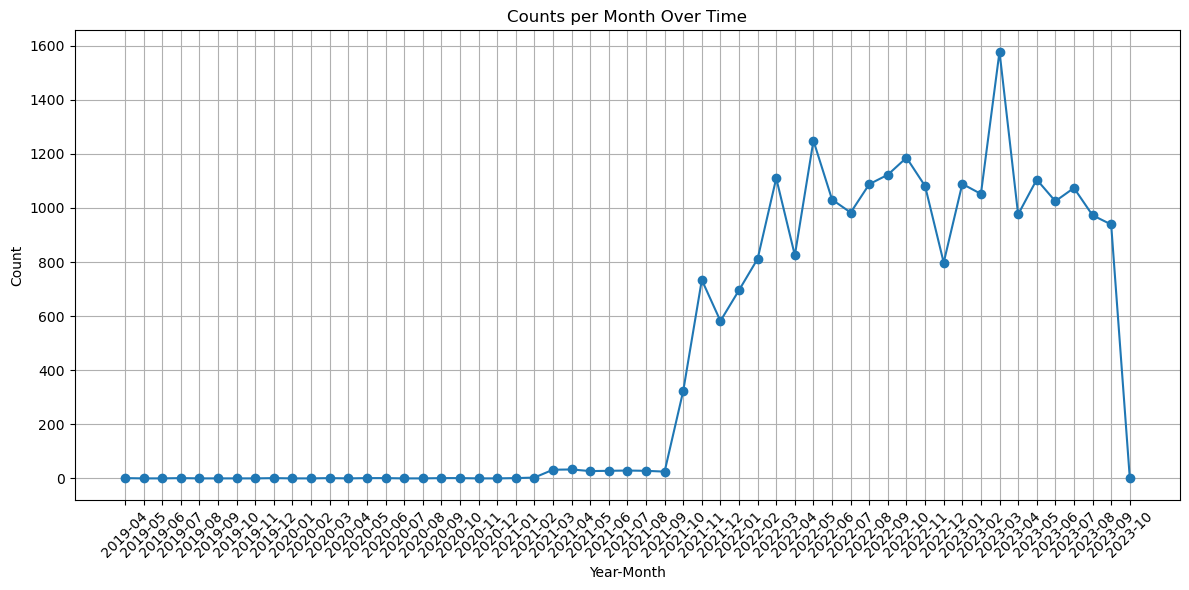

In [25]:
#explorative analysis
# Create a date string for x-axis labels
date_labels = [f"{y}-{str(m).zfill(2)}" for y, m in zip(monthly_counts['Year'], monthly_counts['Month'])]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(date_labels, monthly_counts['Count'], marker='o', linestyle='-')
plt.title("Counts per Month Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
#explorative analysis
print("Artikelanzahl: ", len(df_articles), "Handelstage: ", len(df_stocks))

Artikelanzahl:  23649 Handelstage:  597


In [27]:
# Define the date threshold todo: Daten anpassen?!
date_threshold = pd.to_datetime('2021-06-01', format='%Y-%m-%d')
last_trading_day = pd.to_datetime('2023-09-25', format='%Y-%m-%d')

# remove articles before that threshold
# Create a boolean mask to filter rows with a date after or on June 1, 2021
mask = df_articles.index >= date_threshold
# Apply the mask to filter rows and store it back in the original DataFrame
df_articles = df_articles[mask]

# remove articles after last tradingday
# Create a boolean mask to filter rows with a date after or on June 1, 2021
mask = df_articles.index <= last_trading_day
# Apply the mask to filter rows and store it back in the original DataFrame
df_articles = df_articles[mask]

In [28]:
# remove stock prices before that threshold
# Create a boolean mask to filter rows with a date after or on June 1, 2021
mask = df_stocks['Date'] >= date_threshold
# Apply the mask to filter rows and store it back in the original DataFrame
df_stocks = df_stocks[mask]

In [29]:
#explorative analysis
print("Artikelanzahl: ", len(df_articles), "Handelstage: ", len(df_stocks))

Artikelanzahl:  23451 Handelstage:  597


## explore disconnect between tranding times (9:00 am to 5:30 pm) and articles to map to the next day

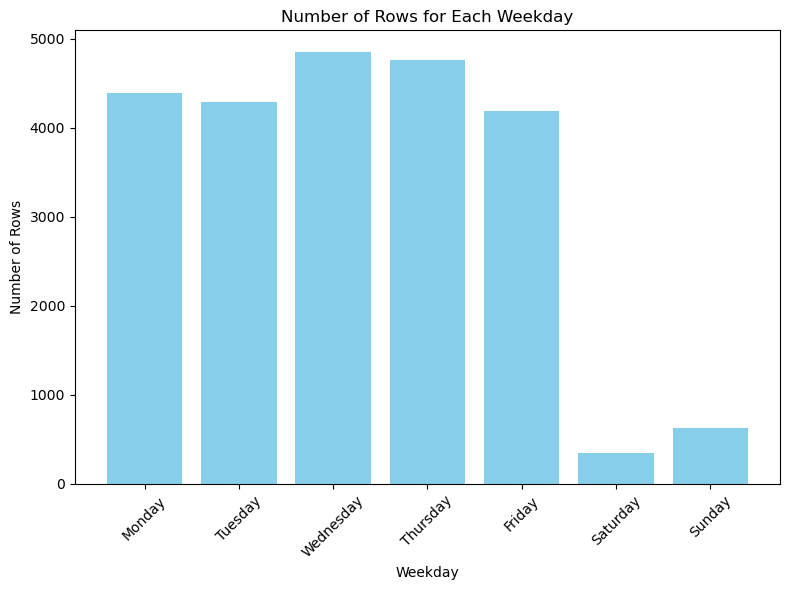

In [30]:
# visulize # articles per weekday (mon-sun) before manipulation
# Map the 'Date' column to weekdays (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df_articles['Date'] = df_articles.index
df_articles['Weekday'] = df_articles['Date'].dt.weekday
# Define the names of weekdays for labeling the plot
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the counts of rows for each weekday
weekday_counts = df_articles['Weekday'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(weekday_names, weekday_counts, color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Number of Rows')
plt.title('Number of Rows for Each Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
#explorative analysis (needs to run for the reference_time to work)
# Convert the "Time" column to datetime format

#df_articles['Date'] = pd.to_datetime(df_articles['Date']) kann weg?!

# Define the reference time as 17:30
reference_time = pd.to_datetime('17:30', format='%H:%M').time()

# Count rows where the "Time" is after 17:30
count_after_1730 = len(df_articles[df_articles['Time'] > reference_time])

# Display the count
print("Count of rows with Time after 17:30:", count_after_1730)

Count of rows with Time after 17:30: 3456


## move articles after 5:30 pm to next day

In [32]:
# Function to adjust the 'Date' column
def adjust_date(row):
    if row['Time'] > reference_time:
        return row['Date'] + pd.DateOffset(days=1)
    return row['Date']

# Apply the function to adjust the 'Date' column
df_articles['Date'] = df_articles.apply(adjust_date, axis=1)

# Display the updated DataFrame
print(df_articles)

                     Unternehmen             Newstyp         Quelle  \
Date                                                                  
2021-06-02  Heidelberg Materials                News        onvista   
2021-06-04       Sartorius (Vz.)                News        onvista   
2021-06-08       Sartorius (Vz.)                News        onvista   
2021-06-09              Covestro                News        onvista   
2021-06-09              Covestro                News        onvista   
...                          ...                 ...            ...   
2023-09-25               Siemens    Pressemitteilung      EQS Group   
2023-09-25              Covestro  Technische Analyse  GodmodeTrader   
2023-09-25   Airbus Group (EADS)                News        dpa-AFX   
2023-09-25      Volkswagen (Vz.)                News        dpa-AFX   
2023-09-25      Volkswagen (Vz.)                News        Reuters   

                                                         Text      Time  \
D

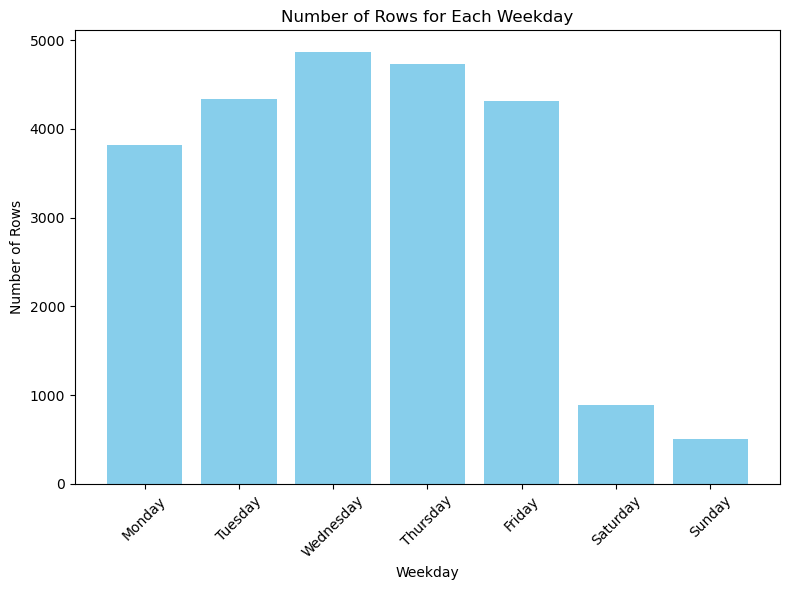

In [33]:
# visulize # articles per weekday (mon-sun) after manipulation of late articles
# Map the 'Date' column to weekdays (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df_articles['Weekday'] = df_articles['Date'].dt.weekday

# Calculate the counts of rows for each weekday
weekday_counts = df_articles['Weekday'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(weekday_names, weekday_counts, color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Number of Rows')
plt.title('Number of Rows for Each Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## match article days to the next valid trading day (meaning article is mapped to the same day, if it was a trading day - otherwise it gets mapped to the next valid day in the future)

In [34]:
# Create a new column in df_filtered to store the nearest date from df_stocks
df_articles['Nearest_Date'] = df_articles['Date'].apply(
    lambda x: min(df_stocks['Date'], key=lambda date: abs(date - x))
)
df_articles['Nearest_Date'] = pd.to_datetime(df_articles['Nearest_Date'], format='%d.%m.%Y')
# Display the resulting DataFrame
print(df_articles)

                     Unternehmen             Newstyp         Quelle  \
Date                                                                  
2021-06-02  Heidelberg Materials                News        onvista   
2021-06-04       Sartorius (Vz.)                News        onvista   
2021-06-08       Sartorius (Vz.)                News        onvista   
2021-06-09              Covestro                News        onvista   
2021-06-09              Covestro                News        onvista   
...                          ...                 ...            ...   
2023-09-25               Siemens    Pressemitteilung      EQS Group   
2023-09-25              Covestro  Technische Analyse  GodmodeTrader   
2023-09-25   Airbus Group (EADS)                News        dpa-AFX   
2023-09-25      Volkswagen (Vz.)                News        dpa-AFX   
2023-09-25      Volkswagen (Vz.)                News        Reuters   

                                                         Text      Time  \
D

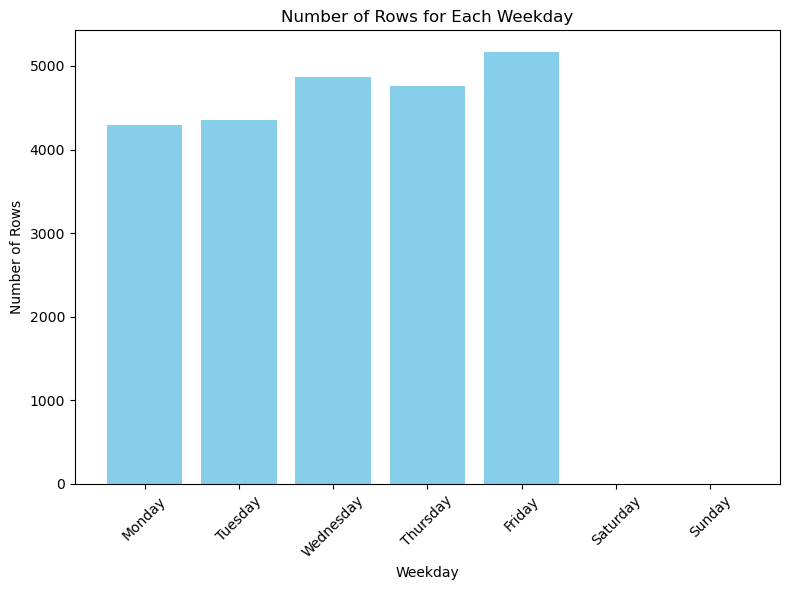

In [35]:
#explorative analysis
# visulize # articles per weekday (mon-sun) after mapping to trading days
# Map the 'Date' column to weekdays (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_articles['Weekday'] = df_articles['Nearest_Date'].dt.weekday

# Calculate the counts of rows for each weekday
weekday_counts = df_articles['Weekday'].value_counts().sort_index()

# Create a dictionary to store counts for all weekdays (filling in zeros for missing weekdays)
all_weekday_counts = {weekday: 0 for weekday in range(7)}
all_weekday_counts.update(weekday_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(weekday_names, [all_weekday_counts[i] for i in range(7)], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Number of Rows')
plt.title('Number of Rows for Each Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

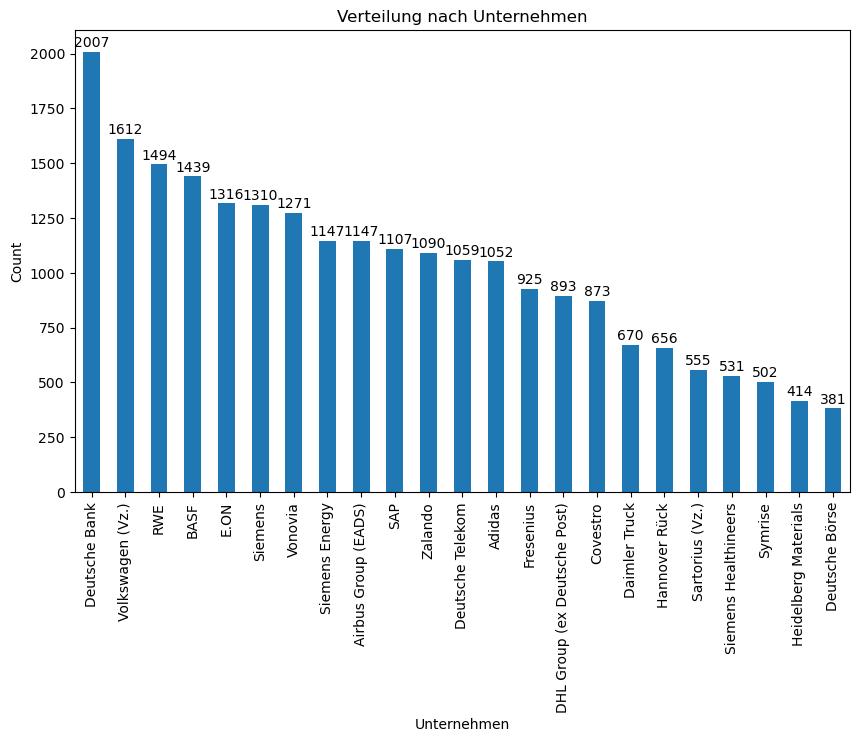

In [36]:
#explorative analysis
# Extract unique values and their counts for the 'Unternehmen' column
unique_unternehmen = df_articles['Unternehmen'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = unique_unternehmen.plot(kind='bar')
plt.title('Verteilung nach Unternehmen')
plt.xlabel('Unternehmen')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Add labels to each bar
for i, v in enumerate(unique_unternehmen):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

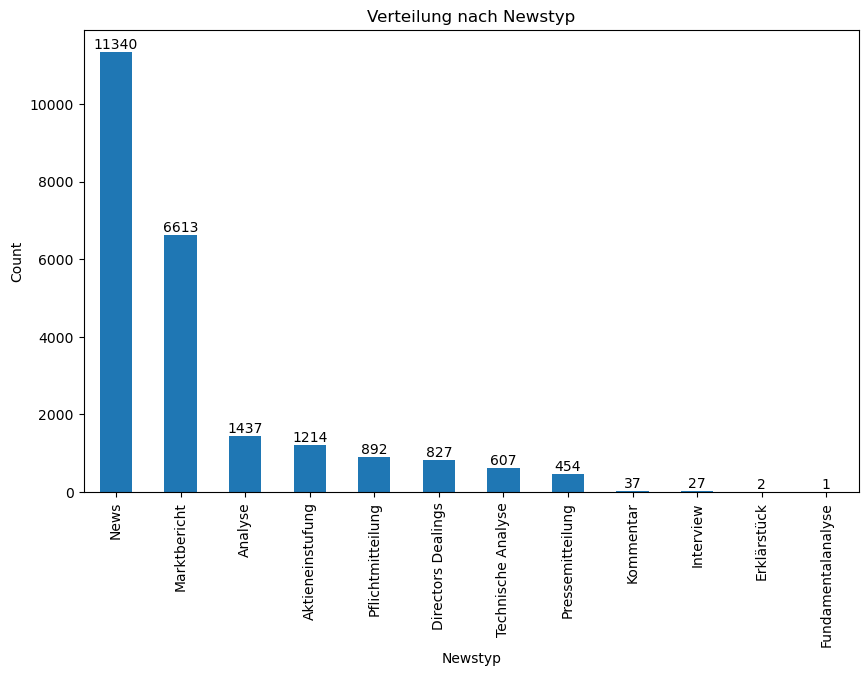

In [37]:
#explorative analysis
# Extract unique values and their counts for the 'Newstyp' column
unique_newstyp = df_articles['Newstyp'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = unique_newstyp.plot(kind='bar')
plt.title('Verteilung nach Newstyp')
plt.xlabel('Newstyp')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Add labels to each bar
for i, v in enumerate(unique_newstyp):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

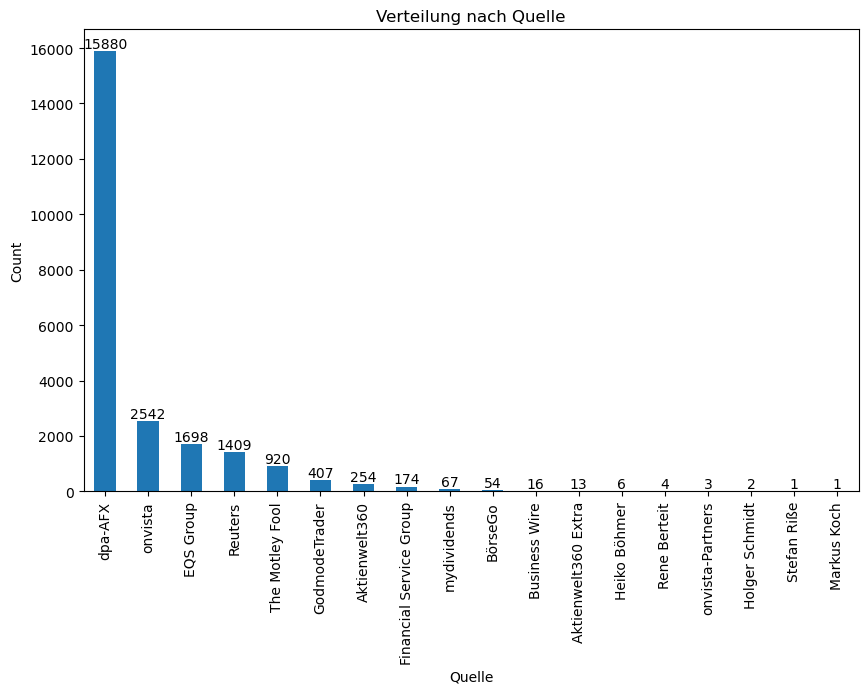

In [38]:
#explorative analysis
# Extract unique values and their counts for the 'Quelle' column
unique_quelle = df_articles['Quelle'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = unique_quelle.plot(kind='bar')
plt.title('Verteilung nach Quelle')
plt.xlabel('Quelle')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Add labels to each bar
for i, v in enumerate(unique_quelle):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

# Cluster the stock price difference in 5 clusters to match the sentiment analysis (--, -, neutral, +, ++)
### Excel Analyse der Stockpreise für Clustering
-0,262228946		    min				<= -0,0128	stark fallend	20%	-2
0,291		            max				<= -0,0035	fallend	20%	-1
0,000209	0,000360	med				<= 0,0035	neutral	20%	0
-0,000006	0,000109	avg				<= 0,0128	steigend	20%	1
-0,009811	-0,009464	25				> 0,0128	stark steigend	20%	2
0,010280	0,009897	75
-0,012819	-0,012440	20
0,012866	0,012482	80
-0,003259	-0,003001	40
0,003783	0,003790	60

In [39]:
# Define the threshold values for classification (5 categorien festgelegt):
negative_threshold_1 = -0.0128
negative_threshold_2 = -0.0035
positive_threshold_1 = 0.0035
positive_threshold_2 = 0.0128


# Iterate through company columns and add a cluster column for each
for col in range(41, 81):
    # Create a new column with the company name and "_cluster" appended
    parts = df_stocks.columns[col].split('-')
    cluster_col = f"cluster_{parts[1]}"

    # Apply the thresholds to classify the cluster
    df_stocks[cluster_col] = df_stocks.iloc[:, col].apply(
        lambda x: "very_negative" if x <= negative_threshold_1 else (
            "negative" if negative_threshold_1 < x <= negative_threshold_2 else (
                "neutral" if negative_threshold_2 < x <= positive_threshold_1 else (
                    "positive" if positive_threshold_1 < x <= positive_threshold_2 else "very_positive"
                )
            )
        )
    )

# Now, df contains cluster columns for each company based on the specified thresholds
print(df_stocks)

          Date  Kurs-Adidas  Kurs-Airbus Group (EADS)  Kurs-Allianz  \
0   2021-06-01       298.30                    108.28        217.00   
1   2021-06-02       297.35                    110.70        216.00   
2   2021-06-03       298.50                    110.06        218.15   
3   2021-06-04       296.55                    109.92        218.25   
4   2021-06-07       298.00                    111.18        218.25   
..         ...          ...                       ...           ...   
592 2023-09-19       165.84                    129.72        233.55   
593 2023-09-20       166.46                    129.00        231.70   
594 2023-09-21       161.38                    124.30        229.50   
595 2023-09-22       163.92                    123.50        231.95   
596 2023-09-25       161.40                    123.10        229.90   

     Kurs-BASF  Kurs-Bayer  Kurs-Beiersdorf  Kurs-BMW  Kurs-Brenntag  \
0        67.84       51.63            96.70     89.26          78.12   
1  

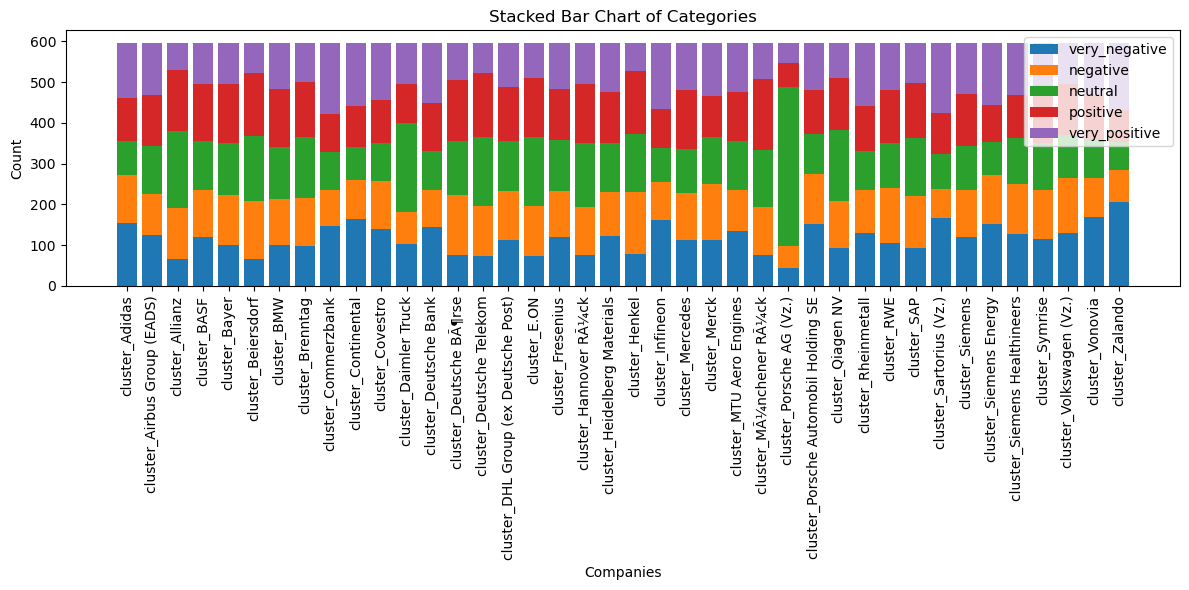

In [40]:
# Select columns 81 to 121
data = df_stocks.iloc[:, 81:121]

# Define the categories
categories = ["very_negative", "negative", "neutral", "positive", "very_positive"]

# Initialize a dictionary to store the counts for each category
category_counts = {category: [] for category in categories}

# Calculate the counts for each category for each column
for col in data.columns:
    counts = data[col].value_counts()
    for category in categories:
        if category in counts:
            category_counts[category].append(counts[category])
        else:
            category_counts[category].append(0)

# Convert the counts into a DataFrame
category_df = pd.DataFrame(category_counts)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
bottom = [0] * len(data.columns)

for category in categories:
    plt.bar(data.columns, category_df[category], label=category, bottom=bottom)
    bottom = [sum(x) for x in zip(bottom, category_df[category])]

plt.xlabel("Companies")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Categories")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
# map the stock price cluster to each article
# Create an empty list to store the stock values
stock_values = []

# Iterate through the rows of df_articles
for index, row in df_articles.iterrows():
    # Extract the "Unternehmen" and "Nearest_Date" values from the current row
    company = row['Unternehmen']
    nearest_date = row['Nearest_Date']
    column_name = f'cluster_{company}'

    # Check if the "Unternehmen" exists as a column in df_stocks
    if column_name in df_stocks.columns:
        # Get the stock value for the specified "Nearest_Date" and "Unternehmen"
        stock_value = df_stocks.loc[df_stocks['Date'] == nearest_date, column_name].values[0]
    else:
        # If "Unternehmen" doesn't exist in df_stocks, assign a default value (e.g., NaN)
        stock_value = None

    # Append the stock value to the list
    stock_values.append(stock_value)

# Create a new column in df_articles and assign the stock_values to it
df_articles['Stock_Value'] = stock_values

# Cleaning text column for sentiment analysis

In [42]:
# Load the German spaCy model
nlp = spacy.load('de_core_news_md')

# Define a regular expression pattern to match and remove the advertisement sections
advertisement_pattern = r'Titelfoto:.*'
# Remove newlines within the Text column
df_articles['Text'] = df_articles['Text'].str.replace('\n', ' ')
df_articles['Text'] = df_articles['Text'].str.replace('\r', ' ')
# Custom function to perform text cleaning
def clean_text(text):
    if pd.notna(text):
        # Lowercasing
        cleaned_text = text.lower()

        # Remove punctuation and special characters
        cleaned_text = ''.join([char for char in cleaned_text if char not in string.punctuation])

        # Tokenization and lemmatization using spaCy
        doc = nlp(cleaned_text)
        lemmatized_tokens = [token.lemma_ for token in doc]

        # Stop word removal
        stop_words = nlp.Defaults.stop_words
        filtered_tokens = [word for word in lemmatized_tokens if word not in stop_words]

        # Remove numeric tokens and short tokens
        filtered_tokens = [word for word in filtered_tokens if not word.isnumeric() and len(word) > 2]

        # Remove URLs and email addresses
        filtered_tokens = [word for word in filtered_tokens if not re.match(r'http\S+|www\S+|\S+@\S+', word)]

        # Remove advertisement sections starting with "Titelfoto:"
        filtered_text = re.sub(advertisement_pattern, '', ' '.join(filtered_tokens))

        # Remove multiple consecutive spaces
        filtered_text = re.sub(r'\s+', ' ', filtered_text).strip()

        return filtered_text
    return text

# Apply the clean_text function to all cells in the 'Text' column
tqdm.pandas(desc="Cleaning Progress")
df_articles['Cleaned_Text'] = df_articles['Text'].progress_apply(clean_text)

print("Text cleaning is complete.")

Cleaning Progress: 100%|██████████| 23451/23451 [17:49<00:00, 21.93it/s] 

Text cleaning is complete.


In [43]:
# export zu csv
# Specify the columns you want to include in the subset DataFrame
columns_to_include = ['Unternehmen', 'Newstyp', 'Quelle', 'Nearest_Date', 'Cleaned_Text', 'Stock_Value']

# Create the subset DataFrame by selecting only the specified columns
subset_df = df_articles[columns_to_include]

# Add a unique identifier column to the subset DataFrame
subset_df['Unique_ID'] = range(1, len(subset_df) + 1)

# Set the index of the subset DataFrame to the 'Unique_ID' column
subset_df.set_index('Unique_ID', inplace=True)

# Export the subset DataFrame to a CSV file
subset_df.to_csv('data//transfer//cleaned_articles_v1.csv', index=False)

C:\Users\600033044\AppData\Local\Temp\ipykernel_27192\2115602756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Unique_ID'] = range(1, len(subset_df) + 1)


In [44]:
subset_df.loc[6, 'Cleaned_Text']

'Onvista Mahlzeit Dax unbeeindruckt Usinflationsdate Curevac Vonovia Itm Power greifen Apple canoo Gerüchteküch Applecar Woche ordentlich Zutat bekommen spekulieren Cupertino Byd Catl Kauf Batterie verhandeln ehemalig bmw Manager Team Apple wechseln planen Apple sogar Übernahme Eauto Super Donnerstag zumindest Dax Sache weder Ezbzinsentscheid Usinflationsdat Dax positiv anstecken lassen deutsch Leitindex Ergebnis lediglich Kenntnis nehmen vermelden Absatzzahl Mai Paul Singer Vonovia Leben schwer Trading Update Itm Power stoßen Gegenliebe Onvista mahlzeit schnell Punkt informieren Folge verpassen einfach Onvista Youtubekanal abonnieren Musterdepot Watchlist Redaktionsleiter Markus Weingran kostenlos abonnieren Blick mobil legen gratis Myonvistaaccount probieren Myonvistade      basisprospekt endgültig Bedingung Basisinformationsblätter erhalten Klick Dokumentensymbol beachten Hinweis Werbung'

In [45]:
# todo: weitere adjustments to stock prices (außer clustering)?

In [46]:
#todo: was ist noch wichtig für Sentiment oder Clustering?